# Polynomial Regression

#### Importing needed  packages

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

<h3 style="color:red">important!</h3>
<p>Pylab combines the pyplot functionality (for plotting) with the numpy functionality (for mathematics and for working with arrays) in a single namespace, <br>making that namespace (or environment) even more MATLAB-like</p>

#### Loading data frame

In [35]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Exploring data

In [36]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


std or standard deviation is $\sqrt\sigma^2=\sigma$

In [37]:
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


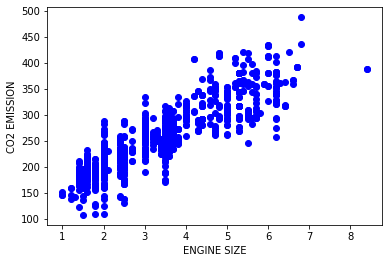

In [38]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.show()

#### Split data

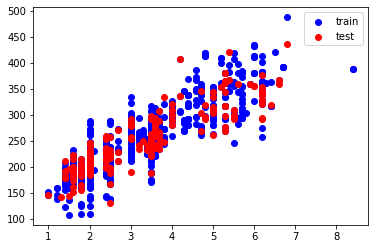

In [39]:
msk=np.random.rand(len(df)) < 0.8
train=cdf[msk]
test=cdf[~msk]

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue', label='train')
ax.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red', label='test')
ax.legend(loc='upper right')
plt.show()

#### Polynomial train_x for degree=3

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

print(train_x[:3])
poly=PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

[[2. ]
 [2.4]
 [1.5]]


array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

#### Modeling

In [41]:
clf=linear_model.LinearRegression()
clf.fit(train_x_poly, train_y)
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         25.45170369  5.41940471 -0.55857455]]
Intercept:  [132.90038837]


#### Prediction

In [42]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

#### Evaluation

In [43]:
from sklearn.metrics import r2_score
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Mean Square Error: %.2f" % np.mean((test_y - test_y_)**2))
print("R2 factor: %.2f" % r2_score(test_y, test_y_))

Mean Absolute Error: 21.87
Mean Square Error: 811.06
R2 factor: 0.77


#### Comparison to polynomial with degree=2

In [44]:
poly1=PolynomialFeatures(degree=2)

train_x_poly1=poly1.fit_transform(train_x)

clf1=linear_model.LinearRegression()
clf1.fit(train_x_poly1, train_y)
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

test_x_poly1=poly1.fit_transform(test_x)
test_y_=clf1.predict(test_x_poly1)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y - test_y_)))
print("Mean Square Error: %.2f" % np.mean((test_y - test_y_)**2))
print("R2 factor: %.2f" % r2_score(test_y, test_y_))

Coefficients:  [[ 0.         25.45170369  5.41940471 -0.55857455]]
Intercept:  [132.90038837]
Mean Absolute Error: 21.87
Mean Square Error: 806.13
R2 factor: 0.77


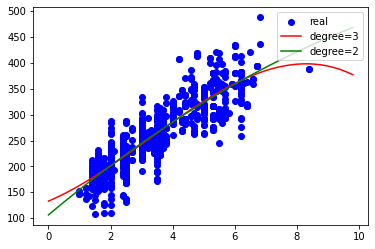

In [45]:
XX=np.arange(0, 10, 0.2)
b=clf.intercept_[0]
theta_1=clf.coef_[0][1]
theta_2=clf.coef_[0][2]
theta_3=clf.coef_[0][3]
YY3=b+theta_1*XX+theta_2*(XX**2)+theta_3*(XX**3)

b=clf1.intercept_[0]
theta_1=clf1.coef_[0][1]
theta_2=clf1.coef_[0][2]
YY2=b+theta_1*XX+theta_2*(XX**2)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue', label='real')
ax.plot(XX, YY3, 'r-', label='degree=3')
ax.plot(XX, YY2, 'g-', label='degree=2')
ax.legend(loc='upper right')
plt.show()